# Lab 2

## 2. Interpolacja za pomoca wielomianów i funkcji sklejanych

### 2.1. Powiązane twierdzenia

### 2.1.1. Twierdzenie o istnieniu i jednoznaczności wielomianu interpolacyjnego

Twierdzenie 2.1 (o istnieniu i jednoznaczności wielomianu interpolacyjnego). Niech dany będzie zbiór $n+1$ punktów $\left(x_{0}, y_{0}\right),\left(x_{1}, y_{1}\right), \ldots,\left(x_{n}, y_{n}\right) \in \mathbb{R}^{2}$ Wówczas istnieje dokładnie jeden wielomian $p_{n}(x)$ stopnia $n$, taki że $p_{n}\left(x_{i}\right)=$ $y_{i} d l a i=0, \ldots, n$.

### 2.1.2. Twierdzenie Rolle'a

Twierdzenie 2.2 (Rolle'a). Niech $f \in C([a, b])$ oraz $f \in C^{1}((a, b))$. Wówczas jeśli $f(a)=f(b)$, to istnieje taki punkt $c \in(a, b)$, że $f^{\prime}(c)=0$.

### 2.1.3. Twierdzenie o błędzie interpolacji

Twierdzenie 2.3. Niech $f \in C^{n+1}([a, b])$ i niech $p_{n}(x)$ będzie wielomianem interpolacyjnym stopnia $n$-tego spełniajacym warunki interpolacji $w$ wezzach $a \leqslant x_{0}<x_{1}<\ldots<x_{n} \leqslant b$. Wtedy istnieje $\xi_{x} \in(a, b)$ taki, $\dot{z} e$

$$
f(x)-p_{n}(x)=\frac{1}{(n+1)!} f^{(n+1)}\left(\xi_{x}\right) \prod_{i=0}^{n}\left(x-x_{i}\right)
$$


In [1]:
import sys
import os
sys.path.append("..")
import matplotlib.pyplot as plt
import numpy as np

from src.interpolation import lagrange_interpolation, vandermonde_interpolation, newton_interpolation, chebyshev_interpolation, cubic_spline_function


### 2.2. Interpolacja wielomianami Vandermonde'a

Rozważmy wielomian interpolacyjny w postaci naturalnej

$$
p_{n}(x)=a_{0}+a_{1} x+a_{2} x^{2}+\ldots+a_{n} x^{n},
$$

spełniajaç warunki interpolacji $p_{n}\left(x_{i}\right)=y_{i}$ dla $i=0,1, \ldots, n$. Wówczas wyznaczenie $n+1$ współczynników $a_{0}, a_{1}, \ldots, a_{n}$ polega na rozwiązaniu układu równań

$$
\left[\begin{array}{ccccc}
1 & x_{0} & x_{0}^{2} & \ldots & x_{0}^{n} \\
1 & x_{1} & x_{1}^{2} & \ldots & x_{1}^{n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^{2} & \ldots & x_{n}^{n}
\end{array}\right]\left[\begin{array}{c}
a_{0} \\
a_{1} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
y_{0} \\
y_{1} \\
\vdots \\
y_{n}
\end{array}\right] .
$$

Macierz powyższego układu nazywa się macierzą Vandermonde'a.

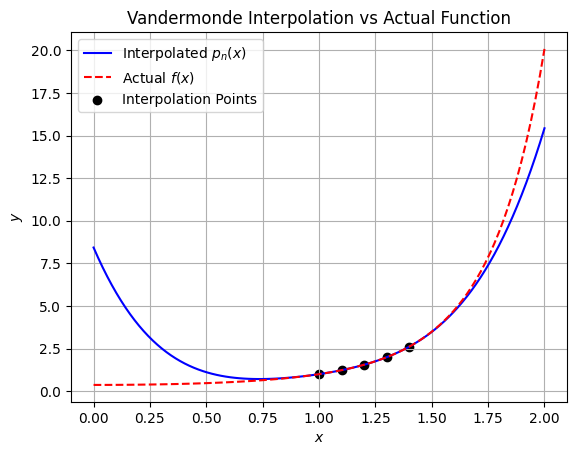

In [2]:
def f(x):
    return np.exp(x**2 - 1)

# Define interpolation points
xs = np.array([1, 1.1, 1.2, 1.3, 1.4])
ys = f(xs)

# Define the range for evaluation
x = np.linspace(0, 2, 100)
y = f(x)

# Compute the interpolated values
px = np.array([vandermonde_interpolation(xi, xs, ys) for xi in x])


# Plot the results
plt.plot(x, px, label="Interpolated $p_n(x)$", color="blue")
plt.plot(x, y, label="Actual $f(x)$", color="red", linestyle="--")
plt.scatter(xs, ys, color="black", label="Interpolation Points")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Vandermonde Interpolation vs Actual Function")
plt.legend()
plt.grid(True)
plt.show()


### 2.3. Interpolacja wielomianami Lagrange'a

Wielomian interpolacyjny Lagrange'a ma postać

$$
p_{n}(x)=\sum_{i=0}^{n} y_{i} l_{i}(x),
$$

gdzie wielomiany $l_{i}(x)$ są dane wzorem

$$
l_{i}=\prod_{j=0, j \neq i}^{n} \frac{x-x_{j}}{x_{i}-x_{j}}
$$

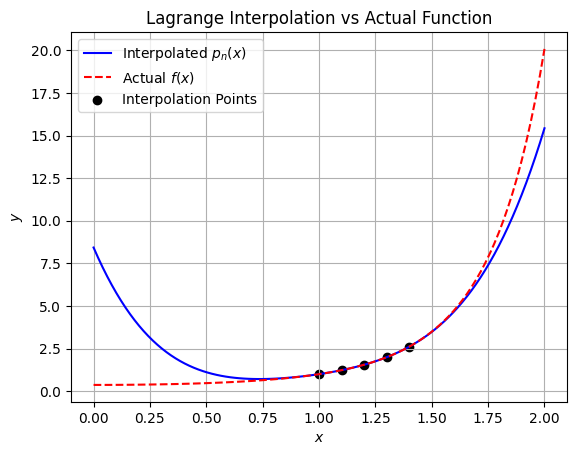

In [3]:
def f(x):
    return np.exp(x**2 - 1)

# Define interpolation points
xs = np.array([1, 1.1, 1.2, 1.3, 1.4])
ys = f(xs)

# Define the range for evaluation
x = np.linspace(0, 2, 100)
y = f(x)

# Compute the interpolated values
px = np.array([lagrange_interpolation(xi, xs, ys) for xi in x])


# Plot the results
plt.plot(x, px, label="Interpolated $p_n(x)$", color="blue")
plt.plot(x, y, label="Actual $f(x)$", color="red", linestyle="--")
plt.scatter(xs, ys, color="black", label="Interpolation Points")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Lagrange Interpolation vs Actual Function")
plt.legend()
plt.grid(True)
plt.show()


### 2.4. Wzór interpolacyjny Newtona

### 2.4.1. Wzór interpolacyjny

Wielomian interpolacyjny Newtona ma postać

$$
p_{n}(x)=\sum_{j=0}^{n} f\left[x_{0}, x_{1}, \ldots, x_{j}\right] q_{j}(x)
$$

gdzie $q_{0}(x) \equiv 1, q_{j}(x)=\prod_{i=0}^{j-1}\left(x-x_{i}\right)$ dla $j=1, \ldots, n$. Natomiast $f\left[x_{0}, x_{1}, \ldots, x_{j}\right]$ to iloraz różnicowy zdefiniowany następująco

Definicja 2.1 (Iloraz różnicowy).

$$
\begin{aligned}
f\left[x_{i}\right] & :=y_{i} \\
f\left[x_{i}, x_{i+1}, \ldots, x_{i+j}\right] & :=\frac{f\left[x_{i+1}, \ldots, x_{i+j}-f\left[x_{i}, x_{i+1}, \ldots, x_{i+j-1}\right]\right.}{x_{i+j}-x_{i}} .
\end{aligned}
$$

### 2.4.2. Tablica trójkątna

Przykładowo dla wielomianu 3-go stopnia tablica trójkątna ilorazów różnicowych ma postać

$$
\begin{array}{lllll}
x_{0} & f\left[x_{0}\right] & f\left[x_{0}, x_{1}\right] & f\left[x_{0}, x_{1}, x_{2}\right] & f\left[x_{0}, x_{1}, x_{2}, x_{3}\right] \\
x_{1} & f\left[x_{1}\right] & f\left[x_{1}, x_{2}\right] & f\left[x_{1}, x_{2}, x_{3}\right] & \\
x_{2} & f\left[x_{2}\right] & f\left[x_{2}, x_{3}\right] & & \\
x_{3} & f\left[x_{3}\right] & & &
\end{array}
$$

Zauważmy, że wartości w pierwszym wierszu są szukanymi współczynnikami.

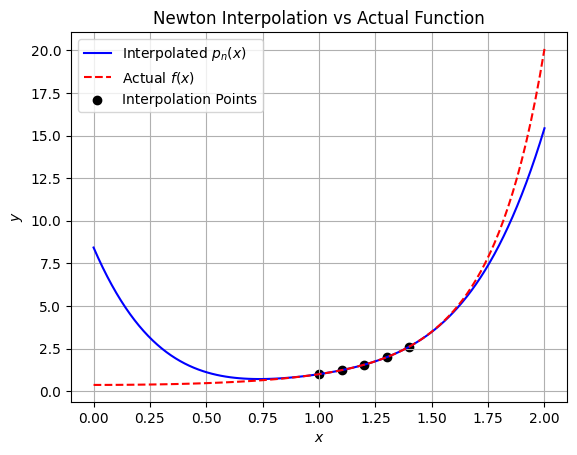

In [4]:
def f(x):
    return np.exp(x**2 - 1)

# Define interpolation points
xs = np.array([1, 1.1, 1.2, 1.3, 1.4])
ys = f(xs)

# Define the range for evaluation
x = np.linspace(0, 2, 100)
y = f(x)

# Compute the interpolated values
px = np.array([newton_interpolation(xi, xs, ys) for xi in x])


# Plot the results
plt.plot(x, px, label="Interpolated $p_n(x)$", color="blue")
plt.plot(x, y, label="Actual $f(x)$", color="red", linestyle="--")
plt.scatter(xs, ys, color="black", label="Interpolation Points")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Newton Interpolation vs Actual Function")
plt.legend()
plt.grid(True)
plt.show()


### 2.5. Interpolacja wielomianami Czebyszewa

### 2.5.1. Wielomiany Czebyszewa pierwszego rodzaju

Definicja 2.2 (Wielomiany Czebyszewa pierwszego rodzaju). Wielomiany Czebyszewa pierwszego rodzaju $T_{n}(x)$ definiujemy rekurencyjnie:

$$
\left\{\begin{array}{l}
T_{0}(x)=1, T_{1}(x)=x \\
T_{n+1}(x)=2 x T_{n}(x)-T_{n-1}(x) \quad \text { dla } n \geqslant 1
\end{array}\right.
$$

Dla $x \in[-1,1]$ wielomiany Czebyszewa można przedstawić $w$ postaci

$$
T_{n}(x)=\cos (n \arccos x) \quad \text { dla } n \geqslant 1 .
$$

Wielomian $T_{n}(x)$ dla $n \geqslant 1$ ma jednokrotne, rzeczywiste miejsca zerowe $x_{j}^{*}$ leżace $w$ przedziale $[-1,1]$ i równe

$$
x_{j}^{*}=\cos \frac{(2 j+1) \pi}{2 n} \quad d l a j=0,1, \ldots, n-1 .
$$

Wielomian $T_{n}(x)$ ma $n+1$ punktów ekstremalnych $y_{j} w$ przedziale $[-1,1]$, gdzie

$$
y_{j}=\cos \frac{j \pi}{n} \quad d l a j=0,1, \ldots, n
$$

### 2.5.2. Błąd interpolacji

Jeśli węzłami $x_{i}, i=0, \ldots, n$, są zera wielomianu Czebyszewa $T_{n+1}$, to dla $|x| \leqslant 1$ mamy następujacce oszacowanie błędu interpolacji

$$
\max _{x \in[-1 ; 1]}\left|f(x)-p_{n}(x)\right| \leqslant \frac{1}{2^{n}(n+1)!} \max _{x \in[-1 ; 1]}\left|f^{(n+1)}(x)\right| .
$$


Testing with n = 5
Testing with n = 10
Testing with n = 15
Testing with n = 20


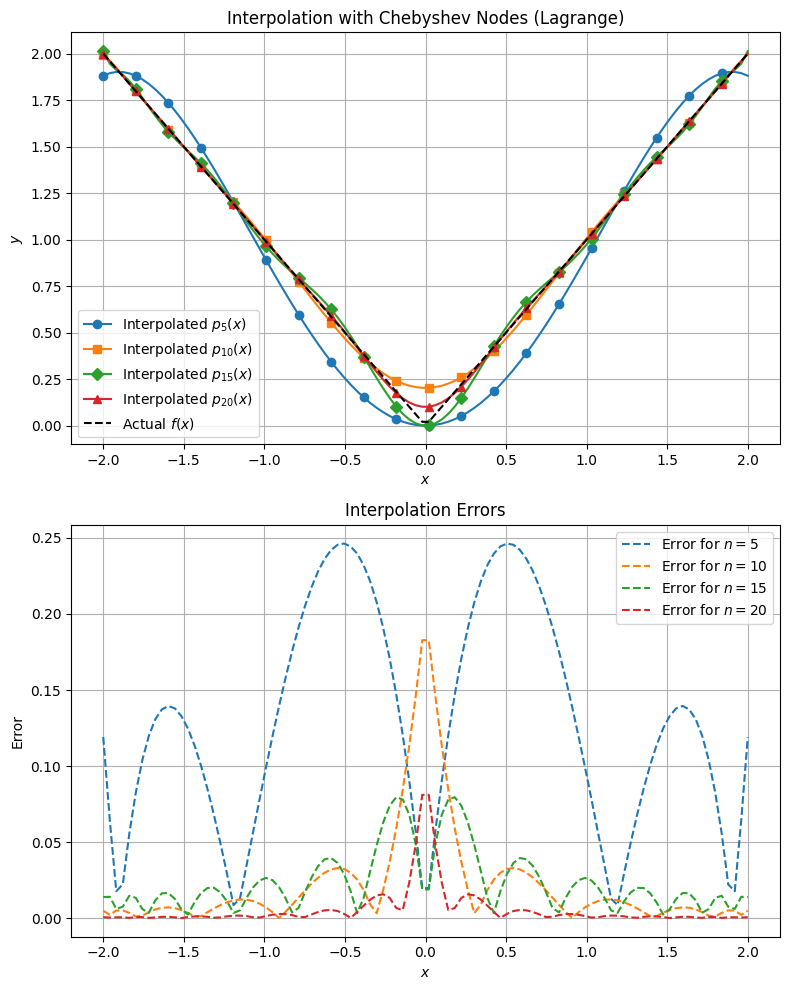

In [5]:
def f(x):
    return np.abs(x)

x = np.linspace(-2, 2, 100)
y_actual = f(x)

n_values = [5, 10, 15, 20]
markers = ['o', 's', 'D', '^']  # List of markers

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot interpolations and calculate errors
for i, n in enumerate(n_values):
    print(f"Testing with n = {n}")
    px = chebyshev_interpolation(x, f, [min(x), max(x)], n, method=lagrange_interpolation)
    axs[0].plot(x, px, label=f"Interpolated $p_{{{n}}}(x)$", marker=markers[i], markevery=5)
    
    # Calculate errors
    current_error = np.abs(y_actual - px)
    axs[1].plot(x, current_error, label=f"Error for $n={n}$", linestyle="--")

axs[0].plot(x, y_actual, label="Actual $f(x)$", color="black", linestyle="--")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[0].set_title(f"Interpolation with Chebyshev Nodes (Lagrange)")
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel("$x$")
axs[1].set_ylabel("Error")
axs[1].set_title("Interpolation Errors")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



### 2.6. Interpolacja funkcjami sklejanymi 3-go stopnia

### 2.6.1. Definicja funkcji sklejanej 3-go stopnia

Definicja 2.3. Niech dana będzie funkcja $f:[a, b] \rightarrow \mathbb{R}$ i zbiór węzłów $a=x_{0}<x_{1}<\ldots<x_{n}=$ b. Funkcja sklejana 3-go stopnia dla funkcji $f$ spetnia nastequjace warunki:

1. funkcja s jest wielomianem 3-go stopnia oznaczonym przez $s_{j}$ na przedziale $\left[x_{j}, x_{j}+1\right]$ dla $j=0,1, \ldots, n-1$;
2. $s_{j}\left(x_{j}\right)=f\left(x_{j}\right)$ i $s_{j}\left(x_{j+1}\right)=f\left(x_{j+1}\right)$ dla $j=0,1, \ldots, n-1$;
3. $s_{j}\left(x_{j+1}\right)=s_{j+1}\left(x_{j+1}\right)$ dla $j=0,1, \ldots, n-2$;
4. $s_{j}^{\prime}\left(x_{j+1}\right)=s_{j+1}^{\prime}\left(x_{j+1}\right)$ dla $j=0,1, \ldots, n-2$;
5. $s_{j}^{\prime \prime}\left(x_{j+1}\right)=s_{j+1}^{\prime \prime}\left(x_{j+1}\right)$ dla $j=0,1, \ldots, n-2$;
6. spetniony jest jeden $z$ warunków brzegowych

$$
\begin{aligned}
& s^{\prime \prime}\left(x_{0}\right)=s^{\prime \prime}\left(x_{n}\right)=0, \\
& s^{\prime}\left(x_{0}\right)=f^{\prime}\left(x_{0}\right) \text { i } s^{\prime}\left(x_{n}\right)=f^{\prime}\left(x_{n}\right) .
\end{aligned}
$$

### 2.6.2. Konstrukcja

Niech

$$
s_{j}(x)=a_{j}+b_{j}\left(x-x_{j}\right)+c_{j}\left(x-x_{j}\right)^{2}+d_{j}\left(x-x_{j}\right)^{3}
$$

dla $j=0,1, \ldots, n-1$. Dodatkowo wprowadzamy $h_{j}=x_{j+1}-x_{j}$ dla $j=$ $0,1, \ldots, n-1$. Współczynniki wielomianu $s_{j}$ można wtedy obliczyć z następujaccych wzorów:

$$
\begin{aligned}
a_{j} & =f\left(x_{j}\right), \\
b_{j} & =\frac{1}{h_{j}}\left(a_{j+1}-a_{j}\right)-\frac{h_{j}}{3}\left(2 c_{j}+c_{j+1}\right), \\
d_{j} & =\frac{1}{3 h_{j}}\left(c_{j+1}-c_{j}\right),
\end{aligned}
$$

a $c_{j}$ rozwiązując równanie macierzowe:

$$
A \vec{x}=\vec{b},
$$

gdzie macierz A

$$
A=\left[\begin{array}{cccccc}
1 & 0 & 0 & 0 & \cdots & 0 \\
h_{0} & 2\left(h_{0}+h_{1}\right) & h_{1} & 0 & \cdots & 0 \\
0 & h_{1} & 2\left(h_{1}+h_{2}\right) & h_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & h_{n-2} & 2\left(h_{n-2}+h_{n-1}\right) & h_{n-1} \\
0 & 0 & \cdots & 0 & 0 & 1
\end{array}\right]
$$

natomiast wektory $\vec{x}$ i $\vec{b}$

$$
\vec{x}=\left[\begin{array}{c}
c_{0} \\
c_{1} \\
\vdots \\
c_{n-1} \\
c_{n}
\end{array}\right], \quad \vec{b}=\left[\begin{array}{c}
0 \\
\frac{3}{h_{1}}\left(a_{2}-a_{1}\right)-\frac{3}{h_{0}}\left(a_{1}-a_{0}\right) \\
\vdots \\
\frac{3}{h_{n-1}}\left(a_{n}-a_{n-1}\right)-\frac{3}{h_{n-2}}\left(a_{n-1}-a_{n-2}\right) \\
0
\end{array}\right] .
$$

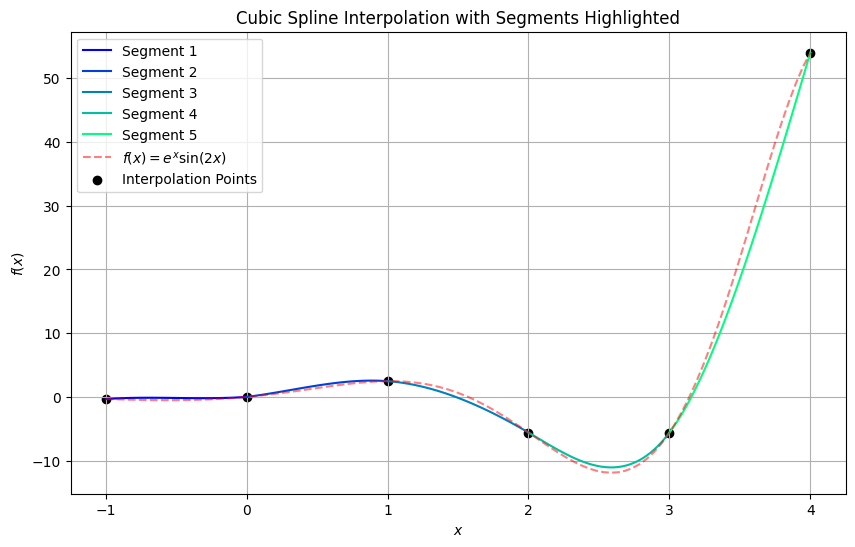

In [59]:
def f(x):
    return np.exp(x) * np.sin(2 * x)

xk = np.linspace(-1, 4, 6) 
xs = np.linspace(-1, 4, 100)  

yk = f(xk)
xs_f = cubic_spline_function(xk, yk)

plt.figure(figsize=(10, 6))
colors = plt.cm.winter(np.linspace(0, 1, len(xk) - 1))
for i in range(len(xk) - 1):
    segment_xs = np.linspace(xk[i], xk[i + 1], 50)
    segment_ys = xs_f(segment_xs)
    plt.plot(segment_xs, segment_ys, color=colors[i], label=f"Segment {i+1}")

plt.plot(xs, f(xs), label="$f(x) = e^x \sin(2x)$", color="red", linestyle="--", alpha=0.5)
plt.scatter(xk, yk, color="black", label="Interpolation Points")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Cubic Spline Interpolation with Segments Highlighted")
plt.legend()
plt.grid(True)
plt.show()
